### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
cars_df = pd.read_csv( "https://drive.google.com/uc?export=download&id=1V_VBbyjGj6vvD0A90S5Lk0DG90djz28B" )

In [3]:
cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_new,engine_new,power_new,age,make,model,KM_Driven
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,1199,88.70,9,honda,jazz,46
1,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,1248,88.76,8,maruti,ertiga,87
2,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,23.08,1461,63.10,7,nissan,micra,86
3,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,22.30,1248,74.00,8,tata,indica,65
4,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,NaN,5.60,25.20,1248,74.00,5,maruti,swift,64


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3092 non-null   object 
 1   Location           3092 non-null   object 
 2   Year               3092 non-null   int64  
 3   Kilometers_Driven  3092 non-null   int64  
 4   Fuel_Type          3092 non-null   object 
 5   Transmission       3092 non-null   object 
 6   Owner_Type         3092 non-null   object 
 7   Mileage            3092 non-null   object 
 8   Engine             3092 non-null   object 
 9   Power              3092 non-null   object 
 10  Seats              3091 non-null   float64
 11  New_Price          411 non-null    object 
 12  Price              3092 non-null   float64
 13  mileage_new        3092 non-null   float64
 14  engine_new         3092 non-null   int64  
 15  power_new          3092 non-null   float64
 16  age                3092 

### Feature Set Selection

In [5]:
cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'mileage_new', 'engine_new', 'power_new', 'age',
       'make', 'model', 'KM_Driven'],
      dtype='object')

In [6]:
x_columns = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats',
              'make', 'mileage_new', 'engine_new', 'model',
              'power_new', 'Location']
## model of the car is not included in the model

In [7]:
cat_features = ['Fuel_Type',
                'Transmission', 'Owner_Type', 'model',
                'make', 'Location']

In [8]:
num_features = list(set(x_columns) - set(cat_features))

In [9]:
num_features

['KM_Driven', 'engine_new', 'Seats', 'age', 'mileage_new', 'power_new']

In [10]:
cars_df[x_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3092 non-null   int64  
 1   Fuel_Type     3092 non-null   object 
 2   age           3092 non-null   int64  
 3   Transmission  3092 non-null   object 
 4   Owner_Type    3092 non-null   object 
 5   Seats         3091 non-null   float64
 6   make          3092 non-null   object 
 7   mileage_new   3092 non-null   float64
 8   engine_new    3092 non-null   int64  
 9   model         3092 non-null   object 
 10  power_new     3092 non-null   float64
 11  Location      3092 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 290.0+ KB


### Encode Categorical Variables

In [11]:
encoded_cars_df = pd.get_dummies(cars_df[x_columns], 
                                 columns=cat_features)

In [12]:
encoded_cars_df.sample(5)

,KM_Driven,age,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,model_800,model_a-star,model_accent,model_alto,model_amaze,model_ameo,model_aspire,model_aveo,model_avventura,model_baleno,model_beat,model_bolero,model_bolt,model_br-v,model_brio,model_celerio,model_ciaz,model_city,model_classic,model_corolla,model_creta,model_crosspolo,model_duster,model_dzire,model_ecosport,model_eeco,...,model_tuv,model_venture,model_verito,model_verna,model_versa,model_vitara,model_wagon,model_wr-v,model_wrv,model_xcent,model_xylo,model_zen,model_zest,make_ambassador,make_chevrolet,make_datsun,make_fiat,make_ford,make_honda,make_hyundai,make_mahindra,make_maruti,make_mitsubishi,make_nissan,make_renault,make_skoda,make_tata,make_toyota,make_volkswagen,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
2936,36,5,5.0,20.51,998,67.04,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2093,15,9,5.0,19.81,1086,68.05,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
719,10,4,5.0,24.07,998,67.10,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2741,69,8,5.0,19.10,1197,85.80,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
574,50,4,5.0,21.40,1197,83.10,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
x_features = list(encoded_cars_df.columns)

In [14]:
encoded_cars_df.shape

(3092, 143)

### Setting X and y variables

In [15]:
X = encoded_cars_df
X['Price'] = cars_df['Price']

### Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(X,train_size = 0.8,random_state = 100)

In [18]:
train.shape

(2473, 144)

In [19]:
train[0:10]

,KM_Driven,age,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,model_800,model_a-star,model_accent,model_alto,model_amaze,model_ameo,model_aspire,model_aveo,model_avventura,model_baleno,model_beat,model_bolero,model_bolt,model_br-v,model_brio,model_celerio,model_ciaz,model_city,model_classic,model_corolla,model_creta,model_crosspolo,model_duster,model_dzire,model_ecosport,model_eeco,...,model_venture,model_verito,model_verna,model_versa,model_vitara,model_wagon,model_wr-v,model_wrv,model_xcent,model_xylo,model_zen,model_zest,make_ambassador,make_chevrolet,make_datsun,make_fiat,make_ford,make_honda,make_hyundai,make_mahindra,make_maruti,make_mitsubishi,make_nissan,make_renault,make_skoda,make_tata,make_toyota,make_volkswagen,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Price
2953,60,6,5.0,20.45,1461,83.80,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6.00
716,42,5,5.0,18.60,1197,81.83,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.05
250,31,3,5.0,20.40,1197,81.80,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.75
1505,62,6,5.0,22.07,1199,73.90,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,4.25
859,169,5,7.0,14.95,2489,93.70,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.00
3002,55,4,5.0,19.87,1461,83.80,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.80
2273,57,7,5.0,21.10,814,55.20,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.84
2347,80,5,5.0,20.14,1498,88.80,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5.80
332,100,10,5.0,20.00,1399,68.00,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.28
329,36,4,5.0,21.10,814,55.20,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.38


In [20]:
test.shape

(619, 144)

## Finding the best model

Using H2O AutoML Library

Details: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html?_ga=2.37321956.534948750.1625291360-92496293.1624088300

In [21]:
# Installing H2O dependencies
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [22]:
# Installing H2O
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 175.8 MB 22 kB/s 
  Created wheel for h2o: filename=h2o-3.35.0.2-py2.py3-none-any.whl size=175832745 sha256=7f2536b05c257c794c71b4584df7d788dbf772b2d7a95f312df3993b19751333
  Stored in directory: /root/.cache/pip/wheels/70/9f/93/66f9ac418f107650661641a2d82bf29c1f1d411e0a817a688c
Successfully built h2o


In [23]:
import h2o
from h2o.automl import H2OAutoML

In [24]:
## prepare data
h2o.init()

h2o_train = h2o.H2OFrame(train)
h2o_test = h2o.H2OFrame(test)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu77h4jio
  JVM stdout: /tmp/tmpu77h4jio/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu77h4jio/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.35.0.2
H2O_cluster_version_age:,19 hours and 20 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_ss0all
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [25]:
aml = H2OAutoML(max_models=10,
                seed=1,
                stopping_metric='MSE',
                sort_metric='MSE',
                max_runtime_secs = 300,
                exclude_algos = ["GLM", "DeepLearning"])

aml.train(x=x_features, 
          y='Price', 
          training_frame=h2o_train) 
#XRT - Extremely Randomized Trees

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20211007_91327

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.11309422603363356
RMSE: 0.3362948498470257
MAE: 0.25109037013919816
RMSLE: 0.06421499886232018
R^2: 0.9754103375614195
Mean Residual Deviance: 0.11309422603363356
Null degrees of freedom: 2472
Residual degrees of freedom: 2465
Null deviance: 11373.967482464495
Residual deviance: 279.6820209811758
AIC: 1646.0825292739305

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3666693393225749
RMSE: 0.6055322776884605
MAE: 0.43170461423003725
RMSLE: 0.10984812019554314
R^2: 0.9202764314613416
Mean Residual Deviance: 0.3666693393225749
Null degrees of freedom: 2472
Residual degrees of freedom: 2468
Null deviance: 11384.413

## Leaderboard

In [26]:
# Get leaderboard with `extra_columns` = 'ALL'
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,mse,mean_residual_deviance,rmse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_2_AutoML_1_20211007_91327,0.366669,0.366669,0.605532,0.431705,0.109848,552,0.183412,StackedEnsemble
StackedEnsemble_AllModels_5_AutoML_1_20211007_91327,0.370142,0.370142,0.608393,0.432808,0.110118,1923,0.236313,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20211007_91327,0.374572,0.374572,0.612023,0.438293,0.111258,283,0.104035,StackedEnsemble
StackedEnsemble_BestOfFamily_6_AutoML_1_20211007_91327,0.3758,0.3758,0.613025,0.438152,0.111298,1729,0.073573,StackedEnsemble
GBM_5_AutoML_1_20211007_91327,0.38721,0.38721,0.622262,0.448861,0.114038,2242,0.043973,GBM
StackedEnsemble_AllModels_1_AutoML_1_20211007_91327,0.392456,0.392456,0.626463,0.44386,0.112564,654,0.128601,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20211007_91327,0.39357,0.39357,0.627351,0.449669,0.113666,3405,0.238981,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20211007_91327,0.399676,0.399676,0.632199,0.44812,0.113955,625,0.077748,StackedEnsemble
XGBoost_3_AutoML_1_20211007_91327,0.420444,0.420444,0.648417,0.460196,0.118483,674,0.012805,XGBoost
GBM_3_AutoML_1_20211007_91327,0.423774,0.423774,0.650979,0.457513,0.116537,3027,0.056834,GBM


### Retrive the details of the models recommended

In [27]:
model_ids = list(aml.leaderboard.as_data_frame()['model_id'])

In [28]:
model_ids

['StackedEnsemble_AllModels_2_AutoML_1_20211007_91327',
 'StackedEnsemble_AllModels_5_AutoML_1_20211007_91327',
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20211007_91327',
 'StackedEnsemble_BestOfFamily_6_AutoML_1_20211007_91327',
 'GBM_5_AutoML_1_20211007_91327',
 'StackedEnsemble_AllModels_1_AutoML_1_20211007_91327',
 'StackedEnsemble_AllModels_4_AutoML_1_20211007_91327',
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20211007_91327',
 'XGBoost_3_AutoML_1_20211007_91327',
 'GBM_3_AutoML_1_20211007_91327',
 'GBM_2_AutoML_1_20211007_91327',
 'StackedEnsemble_BestOfFamily_5_AutoML_1_20211007_91327',
 'GBM_4_AutoML_1_20211007_91327',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20211007_91327',
 'XGBoost_2_AutoML_1_20211007_91327',
 'StackedEnsemble_AllModels_3_AutoML_1_20211007_91327',
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20211007_91327',
 'XGBoost_1_AutoML_1_20211007_91327',
 'DRF_1_AutoML_1_20211007_91327',
 'GBM_1_AutoML_1_20211007_91327',
 'XRT_1_AutoML_1_20211007_91327']

## XGB Model

In [29]:
xgb_model = h2o.get_model('XGBoost_3_AutoML_1_20211007_91327')

In [30]:
xgb_model

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20211007_91327


Model Summary: 


,,number_of_trees
0,,77.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.15685374812755282
RMSE: 0.39604765890931964
MAE: 0.2940313315709689
RMSLE: 0.07646541017633947
Mean Residual Deviance: 0.15685374812755282

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.4204444406457556
RMSE: 0.6484168725794816
MAE: 0.46019634837039897
RMSLE: 0.11848290604053789
Mean Residual Deviance: 0.4204444406457556

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.460222,0.033427,0.417253,0.458309,0.442851,0.505134,0.477560
1,mean_residual_deviance,0.420494,0.066309,0.347644,0.414383,0.375777,0.518356,0.446311
2,mse,0.420494,0.066309,0.347644,0.414383,0.375777,0.518356,0.446311
3,r2,0.908489,0.009803,0.909270,0.907857,0.920048,0.893116,0.912153
4,residual_deviance,0.420494,0.066309,0.347644,0.414383,0.375777,0.518356,0.446311
5,rmse,0.646876,0.050566,0.589614,0.643726,0.613007,0.719970,0.668065
6,rmsle,0.118277,0.007907,0.111123,0.122508,0.108371,0.125230,0.124151



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-10-07 09:15:43,4.845 sec,0.0,4.505952,3.963000,20.303606
1,,2021-10-07 09:15:43,4.897 sec,5.0,1.169722,0.863846,1.368250
2,,2021-10-07 09:15:43,4.920 sec,10.0,0.737028,0.548181,0.543211
3,,2021-10-07 09:15:43,4.946 sec,15.0,0.642337,0.483558,0.412597
4,,2021-10-07 09:15:43,4.971 sec,20.0,0.590098,0.441672,0.348216
5,,2021-10-07 09:15:43,5.001 sec,25.0,0.560047,0.419179,0.313652
6,,2021-10-07 09:15:43,5.031 sec,30.0,0.525945,0.393393,0.276618
7,,2021-10-07 09:15:43,5.058 sec,35.0,0.501728,0.373501,0.251731
8,,2021-10-07 09:15:43,5.088 sec,40.0,0.482458,0.357701,0.232766
9,,2021-10-07 09:15:43,5.117 sec,45.0,0.466962,0.346543,0.218053



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,8376.044922,1.000000,0.502615
1,power_new,2699.346924,0.322270,0.161978
2,mileage_new,1099.290405,0.131242,0.065964
3,engine_new,887.240173,0.105926,0.053240
4,KM_Driven,487.343353,0.058183,0.029244
5,Fuel_Type_Petrol,455.265747,0.054353,0.027319
6,Fuel_Type_Diesel,305.865875,0.036517,0.018354
7,Location_Kolkata,293.954437,0.035095,0.017639
8,make_tata,226.762131,0.027073,0.013607
9,Location_Coimbatore,172.746323,0.020624,0.010366



See the whole table with table.as_data_frame()


In [37]:
xgb_model.actual_params

{'auc_type': 'AUTO',
 'backend': 'cpu',
 'booster': 'gbtree',
 'build_tree_one_node': False,
 'calibrate_model': False,
 'calibration_frame': None,
 'categorical_encoding': 'OneHotInternal',
 'checkpoint': None,
 'col_sample_rate': 0.8,
 'col_sample_rate_per_tree': 0.8,
 'colsample_bylevel': 0.8,
 'colsample_bynode': 1.0,
 'colsample_bytree': 0.8,
 'distribution': 'gaussian',
 'dmatrix_type': 'sparse',
 'eta': 0.3,
 'export_checkpoints_dir': None,
 'fold_assignment': 'Modulo',
 'fold_column': None,
 'gainslift_bins': -1,
 'gamma': 0.0,
 'gpu_id': None,
 'grow_policy': 'depthwise',
 'ignore_const_cols': True,
 'ignored_columns': [],
 'interaction_constraints': None,
 'keep_cross_validation_fold_assignment': False,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': True,
 'learn_rate': 0.3,
 'max_abs_leafnode_pred': 0.0,
 'max_bins': 256,
 'max_delta_step': 0.0,
 'max_depth': 5,
 'max_leaves': 0,
 'max_runtime_secs': 0.0,
 'min_child_weight': 3.0,
 'min_rows': 

In [31]:
varimp = xgb_model.varimp()

In [32]:
varimp_df = pd.DataFrame(varimp, columns = ['variable',	
                                            'relative_importance',	
                                            'scaled_importance',	
                                            'percentage'])

In [33]:
varimp_df

,variable,relative_importance,scaled_importance,percentage
0,age,8376.044922,1.000000,0.502615
1,power_new,2699.346924,0.322270,0.161978
2,mileage_new,1099.290405,0.131242,0.065964
3,engine_new,887.240173,0.105926,0.053240
4,KM_Driven,487.343353,0.058183,0.029244
...,...,...,...,...
85,Owner_Type_Fourth & Above,0.514340,0.000061,0.000031
86,model_indigo,0.494113,0.000059,0.000030
87,model_s,0.478401,0.000057,0.000029
88,model_fabia,0.427401,0.000051,0.000026


In [34]:
varimp_df['cumsum'] = varimp_df.percentage.cumsum()
varimp_df[0:20]

,variable,relative_importance,scaled_importance,percentage,cumsum
0,age,8376.044922,1.000000,0.502615,0.502615
1,power_new,2699.346924,0.322270,0.161978,0.664592
2,mileage_new,1099.290405,0.131242,0.065964,0.730556
3,engine_new,887.240173,0.105926,0.053240,0.783796
4,KM_Driven,487.343353,0.058183,0.029244,0.813040
5,Fuel_Type_Petrol,455.265747,0.054353,0.027319,0.840359
6,Fuel_Type_Diesel,305.865875,0.036517,0.018354,0.858712
7,Location_Kolkata,293.954437,0.035095,0.017639,0.876352
8,make_tata,226.762131,0.027073,0.013607,0.889959
9,Location_Coimbatore,172.746323,0.020624,0.010366,0.900325


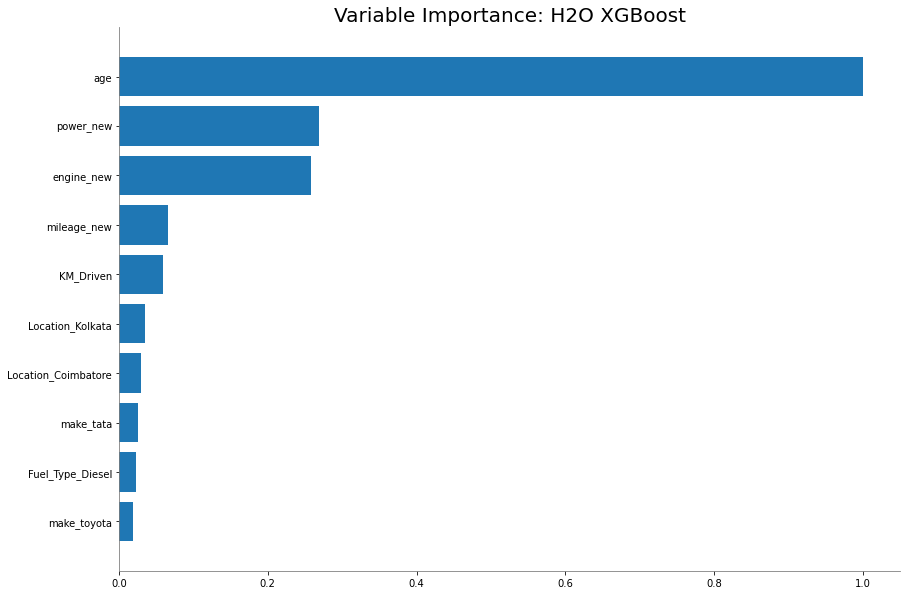

In [ ]:
xgb_model.varimp_plot()

## Random Forest

In [38]:
rf_model = h2o.get_model("DRF_1_AutoML_1_20211007_91327")

In [39]:
rf_model.actual_params

{'auc_type': 'AUTO',
 'balance_classes': False,
 'binomial_double_trees': False,
 'build_tree_one_node': False,
 'calibrate_model': False,
 'calibration_frame': None,
 'categorical_encoding': 'Enum',
 'check_constant_response': True,
 'checkpoint': None,
 'class_sampling_factors': None,
 'col_sample_rate_change_per_level': 1.0,
 'col_sample_rate_per_tree': 1.0,
 'custom_metric_func': None,
 'distribution': 'gaussian',
 'export_checkpoints_dir': None,
 'fold_assignment': 'Modulo',
 'fold_column': None,
 'gainslift_bins': -1,
 'histogram_type': 'UniformAdaptive',
 'ignore_const_cols': True,
 'ignored_columns': [],
 'keep_cross_validation_fold_assignment': False,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': True,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'max_depth': 20,
 'max_runtime_secs': 0.0,
 'min_rows': 1.0,
 'min_split_improvement': 1e-05,
 'model_id': 'DRF_1_AutoML_1_20211007_91327',
 'mtries': -1,
 'nbins': 20,
 'nbins_cat

## Retriving details of the stacked ensembles

In [35]:
# Get the "All Models" Stacked Ensemble model
stacked_model = h2o.get_model("StackedEnsemble_AllModels_2_AutoML_1_20211007_91327")

In [36]:
stacked_model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20211007_91327

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.11309422603363356
RMSE: 0.3362948498470257
MAE: 0.25109037013919816
RMSLE: 0.06421499886232018
R^2: 0.9754103375614195
Mean Residual Deviance: 0.11309422603363356
Null degrees of freedom: 2472
Residual degrees of freedom: 2465
Null deviance: 11373.967482464495
Residual deviance: 279.6820209811758
AIC: 1646.0825292739305

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3666693393225749
RMSE: 0.6055322776884605
MAE: 0.43170461423003725
RMSLE: 0.10984812019554314
R^2: 0.9202764314613416
Mean Residual Deviance: 0.3666693393225749
Null degrees of freedom: 2472
Residual degrees of freedom: 2468
Null deviance: 11384.413676235858
Residual deviance: 906.7732761447277
AIC: 4548.921895793734


In [ ]:
metalearner = h2o.get_model(stacked_model.metalearner()['name'])

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:836: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


In [ ]:
metalearner

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  metalearner_AUTO_StackedEnsemble_AllModels_AutoML_20210703_105138


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 0.008379 )",10,4,1,levelone_training_StackedEnsemble_AllModels_AutoML_20210703_105138




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.37654212485909583
RMSE: 0.613630283525101
MAE: 0.43627626694078625
RMSLE: 0.11269125302932126
R^2: 0.9181298279415484
Mean Residual Deviance: 0.37654212485909583
Null degrees of freedom: 2472
Residual degrees of freedom: 2468
Null deviance: 11373.967482464495
Residual deviance: 931.188674776544
AIC: 4614.62818828768

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.3782092553334732
RMSE: 0.614987199324891
MAE: 0.43677152612107234
RMSLE: 0.1129337137936156
R^2: 0.9177673498819411
Mean Residual Deviance: 0.3782092553334732
Null degrees of freedom: 2472
Residual degrees of freedom: 2468
Null deviance: 11380.572326775302
Residual deviance: 935.3114884396792
AIC: 4625.553164316689

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.43697813,0.018746352,0.42471913,0.4255279,0.4227624,0.44586417,0.46601713
1,mean_residual_deviance,0.37870988,0.04891832,0.35821348,0.33078608,0.34547296,0.41245872,0.4466182
2,mse,0.37870988,0.04891832,0.35821348,0.33078608,0.34547296,0.41245872,0.4466182
3,null_deviance,2276.1145,153.00662,2342.5403,2268.0571,2234.5398,2058.795,2476.6401
4,r2,0.91748244,0.0102744745,0.92220455,0.9272994,0.9236046,0.90202034,0.91228336
5,residual_deviance,187.0623,21.70459,181.61424,164.73146,170.66365,201.69232,216.60982
6,rmse,0.6143887,0.03931345,0.5985094,0.57514006,0.5877695,0.6422295,0.66829497
7,rmsle,0.112863176,0.006082512,0.110052876,0.10687646,0.108639844,0.1202811,0.118465595



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_xval,deviance_se,training_rmse,training_deviance,training_mae,training_r2
0,,2021-07-03 10:53:19,0.000 sec,1,465.817463,0.197004,1.0,0.008379,0.376723,0.37871,0.170771,0.61363,0.376542,0.436276,0.91813



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,XGBoost_3_AutoML_20210703_105138,0.876736,1.000000,0.423357
1,GBM_1_AutoML_20210703_105138,0.545069,0.621702,0.263202
2,XGBoost_2_AutoML_20210703_105138,0.535606,0.610909,0.258632
3,XGBoost_1_AutoML_20210703_105138,0.113506,0.129464,0.054809
4,GBM_3_AutoML_20210703_105138,0.000000,0.000000,0.000000
5,GBM_4_AutoML_20210703_105138,0.000000,0.000000,0.000000
6,GBM_2_AutoML_20210703_105138,0.000000,0.000000,0.000000
7,DRF_1_AutoML_20210703_105138,0.000000,0.000000,0.000000
8,XRT_1_AutoML_20210703_105138,0.000000,0.000000,0.000000
9,GBM_5_AutoML_20210703_105138,0.000000,0.000000,0.000000
